In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread("Image.png")


In [3]:
def showImage(image):
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

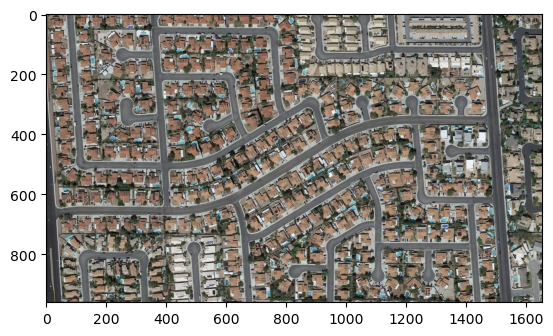

In [4]:
showImage(image)

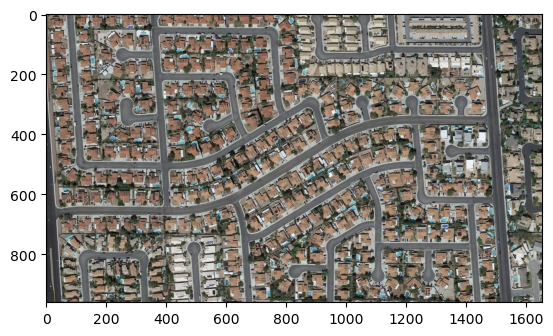

In [5]:
showImage(image)

In [6]:
light_grey = np.array([130,130,130])
dark_grey = np.array([55,50,51])

In [7]:
mask = cv2.inRange(image, dark_grey, light_grey)

In [8]:
mask.size

1591416

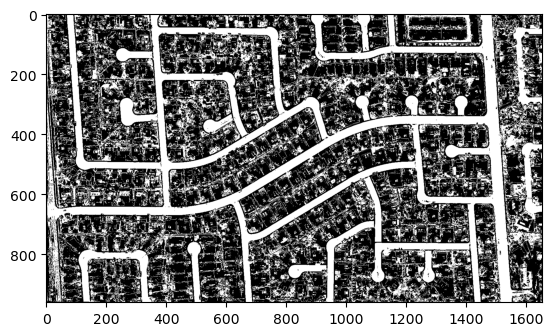

In [9]:
showImage(mask)

In [10]:
test = cv2.medianBlur(mask, 45)

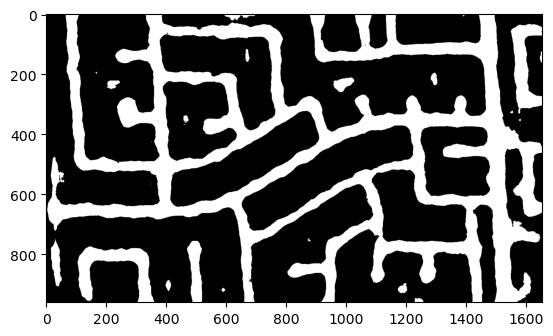

In [11]:
showImage(test)

In [12]:
test2 = cv2.morphologyEx(test, cv2.MORPH_OPEN, (35,35))

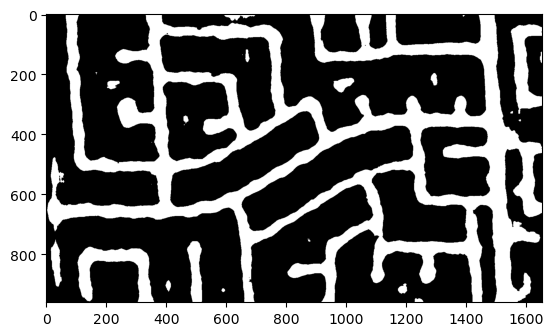

In [13]:
showImage(test2)

In [14]:
nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(test2)

In [15]:
sizes = stats[:, -1]

In [16]:
sizes = sizes[1:]
nb_blobs -= 1

In [17]:
min_size = 1800

In [18]:
im_result = np.zeros_like(image)

In [19]:
for blob in range(nb_blobs):
    if sizes[blob] >= min_size:
        im_result[im_with_separated_blobs == blob + 1] = 255

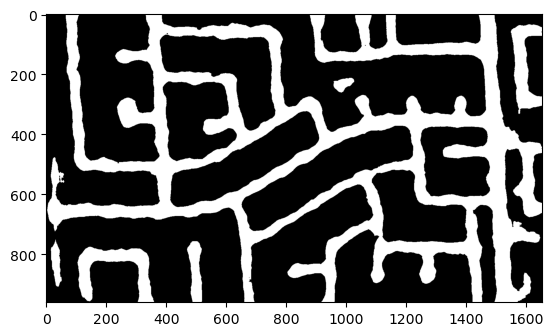

In [20]:
showImage(im_result)

In [21]:
cv2.imwrite("masked_ver.jpg",im_result)

True